<a href="https://colab.research.google.com/github/Ajogeorge29/AI_in_Prognosis/blob/main/Tumor_Stage_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv('TumorAssessment1.csv')

In [ ]:
print(df.columns)


Index(['AGE', 'GENDER', 'TOBACCO HISTORY', 'LATERALITY OF PRIMARY TUMOR',
       'TYPE OF END', 'LATERALITY OF END', 'T STATUS', 'SIZE OF PRIMARY',
       'HISTOLOGIC GRADING', 'DEPTH OF INVASION', 'PATTERN OF INVASION', 'LVI',
       'PNI', 'HLR', 'NO.OF NODES', 'LEVEL I', 'LEVEL II', 'LEVEL III',
       'LEVEL IV', 'SIZE OF NODES >4MM', 'NO. OF NODES BIVALVING',
       'BLOCKS OBTAINED', 'NO. OF NODES BREAD-LOAFED', 'BLOCKS OBTAINED.1',
       'SIZE OF NODES <4MM', 'MICROSCOPIC FINDINGS', 'ROUTINE HP',
       'SERIAL SECTION WITH H & E', 'SERIAL SECTION WITH IHC',
       'LEVEL OF AFFECTED NODE', 'SIZE OF AFFECTED NODE', 'UPSTAGING'],
      dtype='object')


In [ ]:
# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to convert
categorical_columns = ['GENDER', 'TOBACCO HISTORY', 'LATERALITY OF PRIMARY TUMOR', 'HISTOLOGIC GRADING']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
# Use Label Encoding for binary categorical variables
label_encoder = LabelEncoder()

# Assuming the problematic column is called 'MICROSCOPIC FINDINGS'
df['MICROSCOPIC FINDINGS'] = label_encoder.fit_transform(df['MICROSCOPIC FINDINGS'])
df['LEVEL IV'] = label_encoder.fit_transform(df['LEVEL IV'])
df['NO. OF NODES BREAD-LOAFED'] = label_encoder.fit_transform(df['NO. OF NODES BREAD-LOAFED'])


In [ ]:
# Step 4: Feature Selection
# Features (X) should include relevant columns, and target (y) is the T STATUS (tumor stage)
X = df.drop(columns=['T STATUS','TYPE OF END','LATERALITY OF PRIMARY TUMOR','SIZE OF AFFECTED NODE','ROUTINE HP','SERIAL SECTION WITH H & E','SERIAL SECTION WITH IHC','LEVEL OF AFFECTED NODE','UPSTAGING','BLOCKS OBTAINED.1','BLOCKS OBTAINED','LVI','PNI','HLR','LATERALITY OF END','PATTERN OF INVASION','NO.OF NODES','SIZE OF NODES >4MM','NO. OF NODES BIVALVING','NO. OF NODES BREAD-LOAFED','SIZE OF NODES <4MM'])  # Drop the target column 'T STATUS'
y = df['T STATUS']  # Target variable


In [ ]:

# Step 5: Train-Test Split
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X

,AGE,GENDER,TOBACCO HISTORY,SIZE OF PRIMARY,HISTOLOGIC GRADING,DEPTH OF INVASION,LEVEL I,LEVEL II,LEVEL III,LEVEL IV,MICROSCOPIC FINDINGS
0,47,1,1,3.2,1,7.0,4,6,6,3,1
1,53,1,1,4.0,1,5.5,5,6,4,1,1
2,50,1,1,1.6,1,3.8,4,6,3,3,1
3,42,1,0,1.8,0,4.1,6,5,4,3,1
4,48,1,0,2.7,1,3.2,8,6,7,3,1
5,45,0,0,3.3,1,6.7,10,8,6,3,1
6,45,1,1,1.5,0,1.2,8,5,6,3,1
7,40,0,0,2.0,1,4.0,6,7,2,3,1
8,46,1,0,3.8,1,6.3,8,4,3,2,1
9,52,1,1,3.4,0,5.0,4,7,5,3,1


In [ ]:
y

,T STATUS
0,T2
1,T2
2,T1
3,T1
4,T2
5,T2
6,T1
7,T1
8,T2
9,T2


In [ ]:

# Step 6: Model Training
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Step 7: Model Prediction
# Predict on the test set
y_pred = rf_model.predict(X_test)

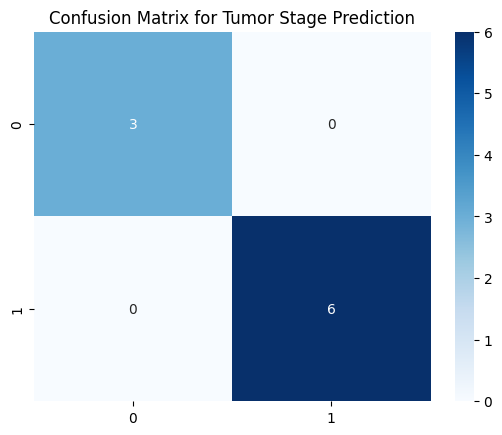

              precision    recall  f1-score   support

          T1       1.00      1.00      1.00         3
          T2       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



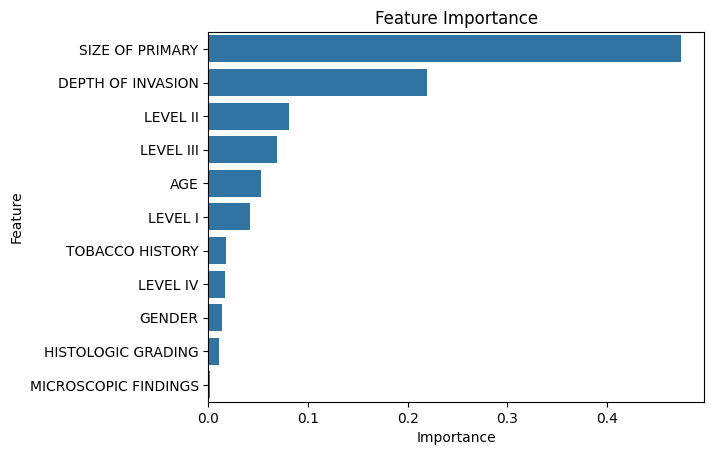

In [ ]:


# Step 8: Model Evaluation
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tumor Stage Prediction')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Optional: Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
